a) Un modelo de regresión que le permita predecir cualquier variable de interés
en función a otras.
</b>

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Cargar datos
df = pd.read_excel('credittable.xlsx')
df = pd.DataFrame(df)

# Convertir columnas numéricas a float, manejando errores de conversión
num_cols = ['WC_TA', 'RE_TA', 'MVE_BVTD', 'S_TA']
df[num_cols] = df[num_cols].replace(',', '.', regex=True).astype(float)

# Definir variables predictoras y objetivo
X = df[['WC_TA', 'RE_TA', 'MVE_BVTD', 'S_TA', 'Industry']]  # Variables independientes
y = df['EBIT_TA']  # Variable objetivo

# Dividir en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir modelos de regresión
modelos = {
    "Regresión Lineal": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "SVR": SVR(kernel='rbf'),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Evaluar cada modelo
def evaluar_modelo(modelo, nombre):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'\n{nombre}:')
    print(f'Error Cuadrático Medio (MSE): {mse:.4f}')
    print(f'Coeficiente de Determinación (R²): {r2:.4f}')
    return r2

# Comparar modelos
resultados = {}
for nombre, modelo in modelos.items():
    resultados[nombre] = evaluar_modelo(modelo, nombre)

# Mostrar el mejor modelo
mejor_modelo = max(resultados, key=resultados.get)
print(f'\nEl mejor modelo es: {mejor_modelo} con un R² de {resultados[mejor_modelo]:.4f}')




Regresión Lineal:
Error Cuadrático Medio (MSE): 0.0001
Coeficiente de Determinación (R²): 0.9128

Ridge:
Error Cuadrático Medio (MSE): 0.0001
Coeficiente de Determinación (R²): 0.9138

Lasso:
Error Cuadrático Medio (MSE): 0.0007
Coeficiente de Determinación (R²): -0.0019

Random Forest:
Error Cuadrático Medio (MSE): 0.0000
Coeficiente de Determinación (R²): 0.9391

Gradient Boosting:
Error Cuadrático Medio (MSE): 0.0001
Coeficiente de Determinación (R²): 0.9281

SVR:
Error Cuadrático Medio (MSE): 0.0017
Coeficiente de Determinación (R²): -1.3741

XGBoost:
Error Cuadrático Medio (MSE): 0.0002
Coeficiente de Determinación (R²): 0.7906

El mejor modelo es: Random Forest con un R² de 0.9391


<ipython-input-9-925f8467e471>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(resultados.keys()), y=list(resultados.values()), palette='viridis')


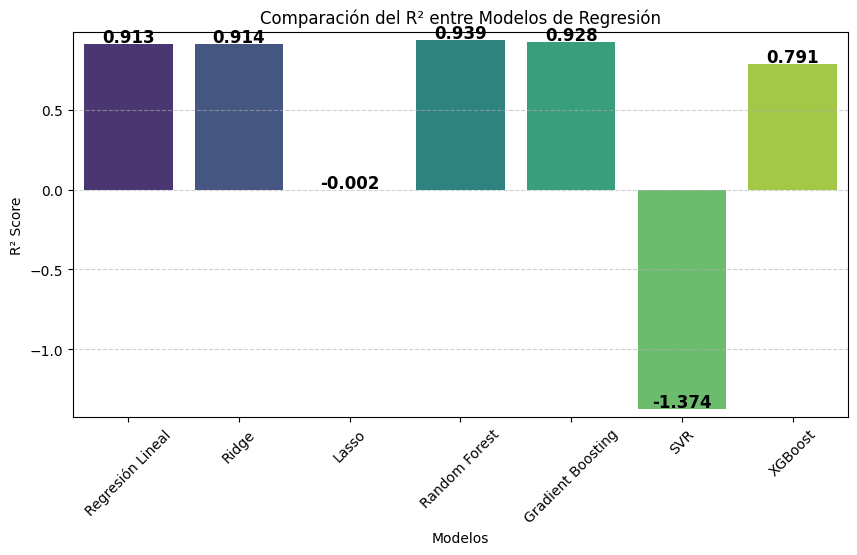

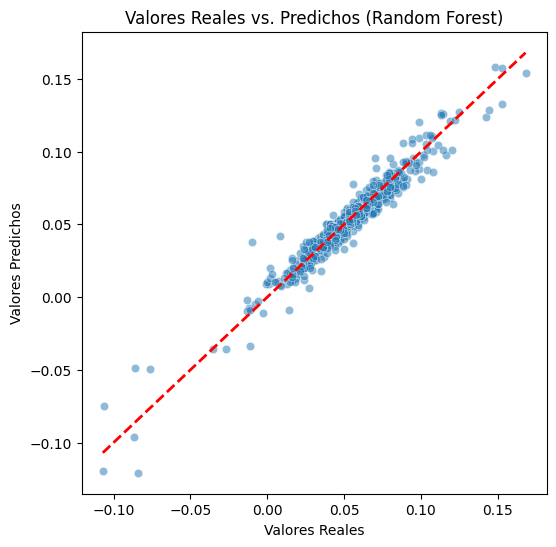

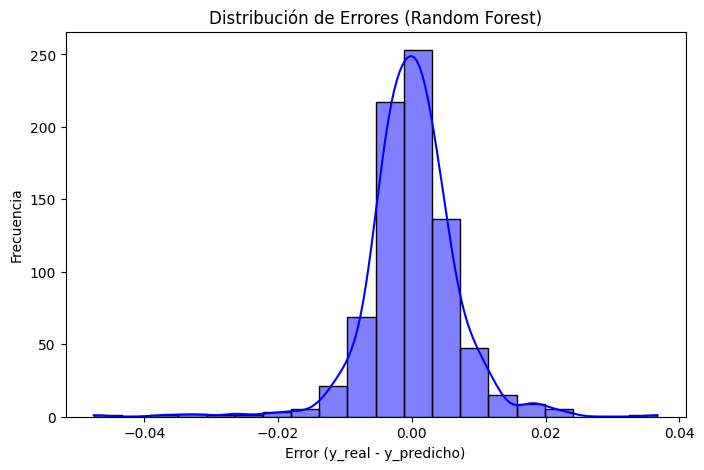

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mejora en la visualización de la comparación de R²
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=list(resultados.keys()), y=list(resultados.values()), palette='viridis')

# Agregar etiquetas de los valores en las barras
for index, value in enumerate(resultados.values()):
    ax.text(index, value + 0.01, f'{value:.3f}', ha='center', fontsize=12, fontweight='bold')

# Ajustar los límites del eje Y para resaltar diferencias
plt.ylim(min(resultados.values()) - 0.05, max(resultados.values()) + 0.05)

plt.xlabel('Modelos')
plt.ylabel('R² Score')
plt.title('Comparación del R² entre Modelos de Regresión')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


# Evaluación del mejor modelo seleccionado
modelo_seleccionado = modelos[mejor_modelo]
y_pred_mejor = modelo_seleccionado.predict(X_test)

# Gráfico de dispersión entre valores reales y predichos
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred_mejor, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r', linewidth=2)  # Línea de referencia
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title(f'Valores Reales vs. Predichos ({mejor_modelo})')
plt.show()

# Histograma de errores (residuos)
errores = y_test - y_pred_mejor
plt.figure(figsize=(8, 5))
sns.histplot(errores, bins=20, kde=True, color='blue')
plt.xlabel('Error (y_real - y_predicho)')
plt.ylabel('Frecuencia')
plt.title(f'Distribución de Errores ({mejor_modelo})')
plt.show()



b) Un modelo de clasificación que le permita predecir el Rating en función al resto de variables de interés.


Regresión Logística - Precisión: 0.7243
              precision    recall  f1-score   support

           0       0.71      0.63      0.67       115
           1       0.77      0.66      0.71        73
           2       0.91      0.94      0.92       124
           3       0.72      0.30      0.42        70
           4       0.63      0.82      0.71       174
           5       0.70      0.74      0.72       208
           6       0.84      0.70      0.76        23

    accuracy                           0.72       787
   macro avg       0.75      0.68      0.70       787
weighted avg       0.73      0.72      0.72       787



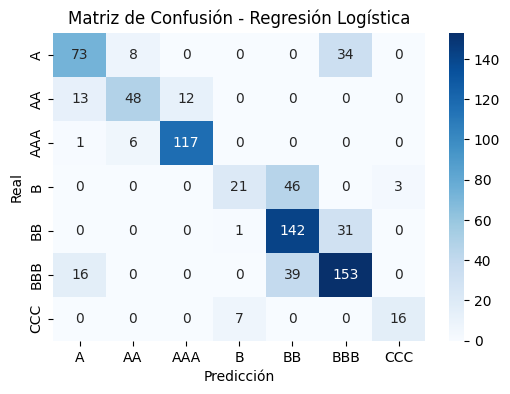


SVC - Precisión: 0.7382
              precision    recall  f1-score   support

           0       0.76      0.64      0.69       115
           1       0.75      0.75      0.75        73
           2       0.92      0.94      0.93       124
           3       0.71      0.34      0.46        70
           4       0.64      0.80      0.71       174
           5       0.72      0.75      0.73       208
           6       0.81      0.74      0.77        23

    accuracy                           0.74       787
   macro avg       0.76      0.71      0.72       787
weighted avg       0.74      0.74      0.73       787



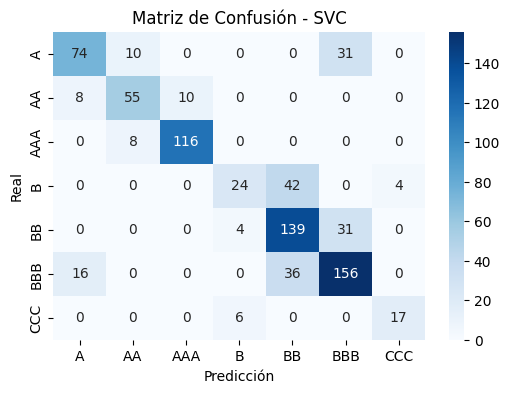

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:50:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost - Precisión: 0.7294
              precision    recall  f1-score   support

           0       0.79      0.68      0.73       115
           1       0.78      0.74      0.76        73
           2       0.89      0.95      0.92       124
           3       0.57      0.46      0.51        70
           4       0.63      0.69      0.66       174
           5       0.71      0.75      0.73       208
           6       0.74      0.74      0.74        23

    accuracy                           0.73       787
   macro avg       0.73      0.71      0.72       787
weighted avg       0.73      0.73      0.73       787



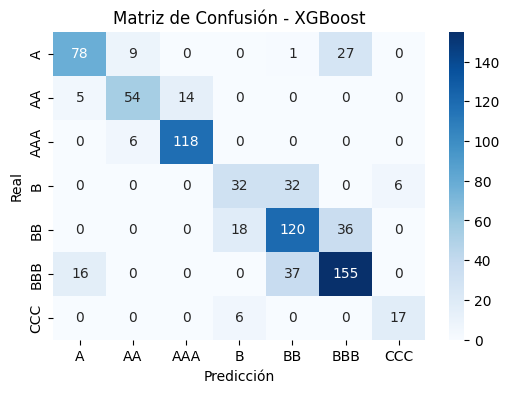


Random Forest - Precisión: 0.7370
              precision    recall  f1-score   support

           0       0.73      0.70      0.71       115
           1       0.82      0.73      0.77        73
           2       0.91      0.95      0.93       124
           3       0.63      0.41      0.50        70
           4       0.65      0.75      0.70       174
           5       0.71      0.74      0.73       208
           6       0.76      0.70      0.73        23

    accuracy                           0.74       787
   macro avg       0.74      0.71      0.72       787
weighted avg       0.74      0.74      0.73       787



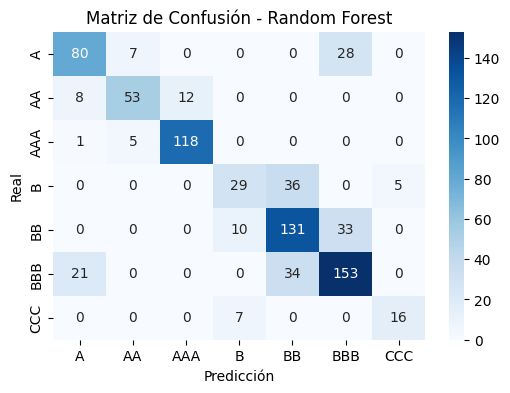


El mejor modelo es: SVC con una precisión de 0.7382


<ipython-input-10-c732743edc82>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(resultados.keys()), y=list(resultados.values()), palette='viridis')


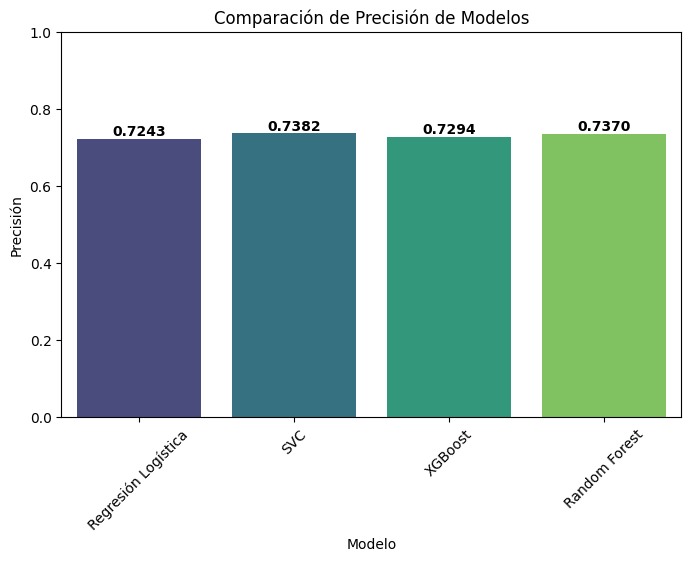

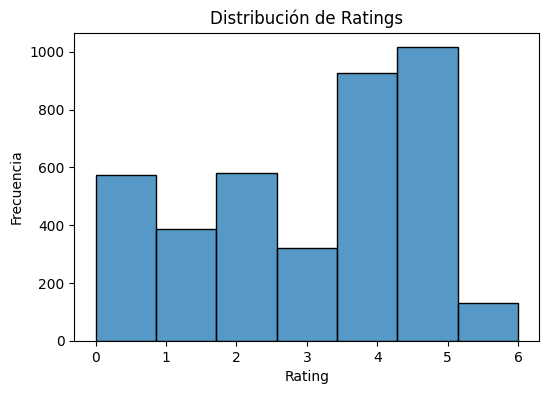

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Cargar datos
df = pd.read_excel('credittable.xlsx')

# Convertir columnas numéricas a float, manejando errores
num_cols = ['WC_TA', 'RE_TA', 'EBIT_TA', 'MVE_BVTD', 'S_TA']
df[num_cols] = df[num_cols].replace(',', '.', regex=True).astype(float)

# Convertir la variable categórica 'Rating' en valores numéricos
le = LabelEncoder()
df['Rating'] = le.fit_transform(df['Rating'])

# Definir variables predictoras y objetivo
X = df[['WC_TA', 'RE_TA', 'EBIT_TA', 'MVE_BVTD', 'S_TA', 'Industry']]
y = df['Rating']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelos de clasificación
modelos = {
    "Regresión Logística": LogisticRegression(max_iter=1000),
    "SVC": SVC(kernel='linear'),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Evaluar modelos
resultados = {}
for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    resultados[nombre] = acc

    print(f'\n{nombre} - Precisión: {acc:.4f}')
    print(classification_report(y_test, y_pred))

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.title(f'Matriz de Confusión - {nombre}')
    plt.show()

# Seleccionar el mejor modelo
mejor_modelo_nombre = max(resultados, key=resultados.get)
modelo_final = modelos[mejor_modelo_nombre]

print(f'\nEl mejor modelo es: {mejor_modelo_nombre} con una precisión de {resultados[mejor_modelo_nombre]:.4f}')

# Visualizar precisión de los modelos
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=list(resultados.keys()), y=list(resultados.values()), palette='viridis')
plt.xlabel('Modelo')
plt.ylabel('Precisión')
plt.title('Comparación de Precisión de Modelos')
plt.xticks(rotation=45)
plt.ylim(0, 1)

# Agregar los valores encima de las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', weight='bold')

plt.show()

# Histograma de la variable objetivo
plt.figure(figsize=(6, 4))
sns.histplot(y, bins=len(set(y)), kde=False)
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.title('Distribución de Ratings')
plt.show()



Regresión Logística - Precisión: 0.7243
              precision    recall  f1-score   support

           0       0.71      0.63      0.67       115
           1       0.77      0.66      0.71        73
           2       0.91      0.94      0.92       124
           3       0.72      0.30      0.42        70
           4       0.63      0.82      0.71       174
           5       0.70      0.74      0.72       208
           6       0.84      0.70      0.76        23

    accuracy                           0.72       787
   macro avg       0.75      0.68      0.70       787
weighted avg       0.73      0.72      0.72       787



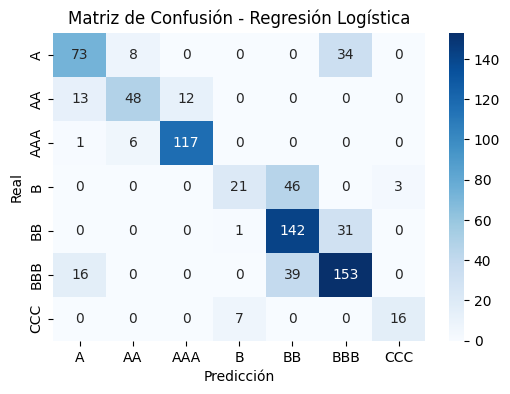


SVC - Precisión: 0.7382
              precision    recall  f1-score   support

           0       0.76      0.64      0.69       115
           1       0.75      0.75      0.75        73
           2       0.92      0.94      0.93       124
           3       0.71      0.34      0.46        70
           4       0.64      0.80      0.71       174
           5       0.72      0.75      0.73       208
           6       0.81      0.74      0.77        23

    accuracy                           0.74       787
   macro avg       0.76      0.71      0.72       787
weighted avg       0.74      0.74      0.73       787



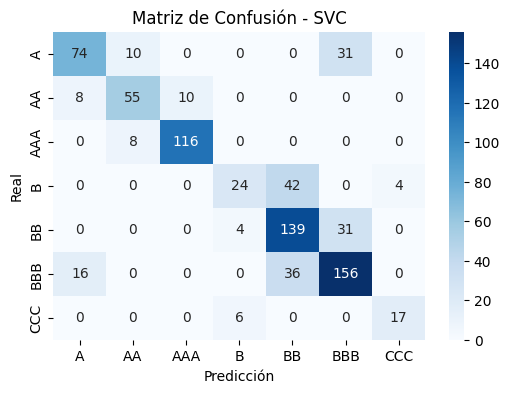

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:50:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost - Precisión: 0.7294
              precision    recall  f1-score   support

           0       0.79      0.68      0.73       115
           1       0.78      0.74      0.76        73
           2       0.89      0.95      0.92       124
           3       0.57      0.46      0.51        70
           4       0.63      0.69      0.66       174
           5       0.71      0.75      0.73       208
           6       0.74      0.74      0.74        23

    accuracy                           0.73       787
   macro avg       0.73      0.71      0.72       787
weighted avg       0.73      0.73      0.73       787



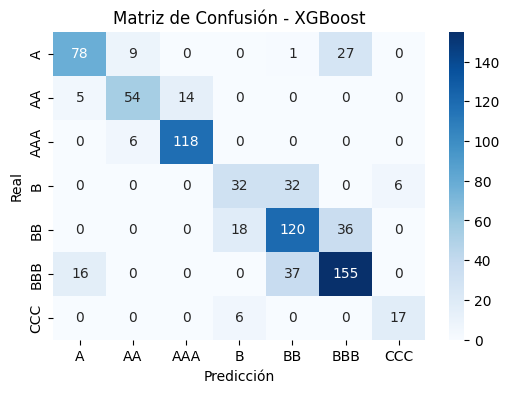


Random Forest - Precisión: 0.7370
              precision    recall  f1-score   support

           0       0.73      0.70      0.71       115
           1       0.82      0.73      0.77        73
           2       0.91      0.95      0.93       124
           3       0.63      0.41      0.50        70
           4       0.65      0.75      0.70       174
           5       0.71      0.74      0.73       208
           6       0.76      0.70      0.73        23

    accuracy                           0.74       787
   macro avg       0.74      0.71      0.72       787
weighted avg       0.74      0.74      0.73       787



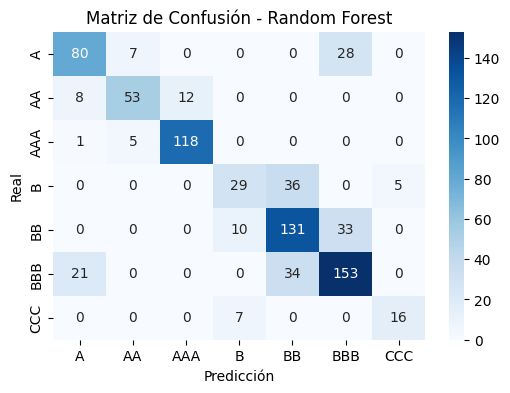


El mejor modelo es: SVC con una precisión de 0.7382


<ipython-input-11-64b165517b53>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(resultados.keys()), y=list(resultados.values()), palette='viridis')


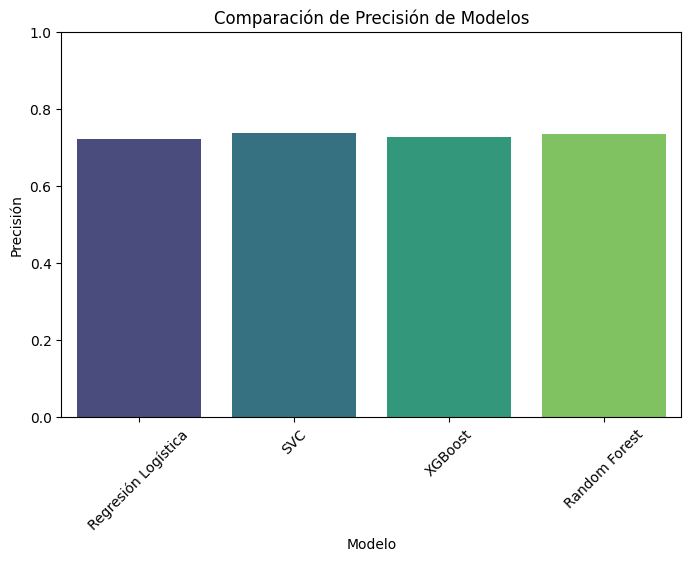

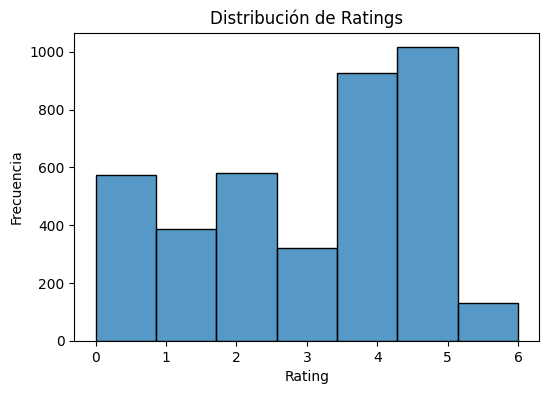

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Cargar datos
df = pd.read_excel('credittable.xlsx')

# Convertir columnas numéricas a float, manejando errores
num_cols = ['WC_TA', 'RE_TA', 'EBIT_TA', 'MVE_BVTD', 'S_TA']
df[num_cols] = df[num_cols].replace(',', '.', regex=True).astype(float)

# Convertir la variable categórica 'Rating' en valores numéricos
le = LabelEncoder()
df['Rating'] = le.fit_transform(df['Rating'])

# Definir variables predictoras y objetivo
X = df[['WC_TA', 'RE_TA', 'EBIT_TA', 'MVE_BVTD', 'S_TA', 'Industry']]
y = df['Rating']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelos de clasificación
modelos = {
    "Regresión Logística": LogisticRegression(max_iter=1000),
    "SVC": SVC(kernel='linear'),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Evaluar modelos
resultados = {}
for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    resultados[nombre] = acc

    print(f'\n{nombre} - Precisión: {acc:.4f}')
    print(classification_report(y_test, y_pred))

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.title(f'Matriz de Confusión - {nombre}')
    plt.show()

# Seleccionar el mejor modelo
mejor_modelo_nombre = max(resultados, key=resultados.get)
modelo_final = modelos[mejor_modelo_nombre]

print(f'\nEl mejor modelo es: {mejor_modelo_nombre} con una precisión de {resultados[mejor_modelo_nombre]:.4f}')

# Visualizar precisión de los modelos
plt.figure(figsize=(8, 5))
sns.barplot(x=list(resultados.keys()), y=list(resultados.values()), palette='viridis')
plt.xlabel('Modelo')
plt.ylabel('Precisión')
plt.title('Comparación de Precisión de Modelos')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

# Histograma de la variable objetivo
plt.figure(figsize=(6, 4))
sns.histplot(y, bins=len(set(y)), kde=False)
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.title('Distribución de Ratings')
plt.show()

In [12]:
# Obtener la correspondencia entre los valores numéricos y los originales
rating_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

# Mostrar la relación entre los valores numéricos y las etiquetas originales
print("Correspondencia de valores numéricos con categorías originales:")
for categoria, valor in rating_mapping.items():
    print(f"{valor} → {categoria}")


Correspondencia de valores numéricos con categorías originales:
0 → A
1 → AA
2 → AAA
3 → B
4 → BB
5 → BBB
6 → CCC


d) El departamento comercial acaba de dar entrada a un nuevo cliente con una
serie de características. En función al modelo de clasificación elegido, ¿podría
otorgarle el Rating correspondiente? Las características son:

In [13]:
# Diccionario de equivalencias entre valores numéricos y categorías de Rating
rating_dict = {
    0: 'A',
    1: 'AA',
    2: 'AAA',
    3: 'B',
    4: 'BB',
    5: 'BBB',
    6: 'CCC'
}

# Crear un DataFrame con las características del nuevo cliente
nuevo_cliente = pd.DataFrame({
    'WC_TA': [0.01],
    'RE_TA': [0.12],
    'EBIT_TA': [0.04],
    'MVE_BVTD': [2.12],
    'S_TA': [0.45],
    'Industry': [9]
})

# Predecir el rating del nuevo cliente
rating_predicho = modelo_final.predict(nuevo_cliente)[0]

# Convertir el resultado numérico a la categoría de Rating
rating_categorizado = rating_dict.get(rating_predicho, "Desconocido")

print(f'El Rating asignado al nuevo cliente es: {rating_categorizado}')

El Rating asignado al nuevo cliente es: A
